In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Customize data output: DOS_dict = {'Label':['DOSfile','SetPosition','NormalizationFactor']
DOS_dict = {'Ni (d)':['X-NO.dat',2,96], 'N (p)':['X-NO.dat',4,4], 'O (p)':['X-NO.dat',5,4]}
# DOS_dict = {'Ni (d)':['X-NO-iso07-DOS-surf.dat',2,96], 'N (p)':['X-NO-iso07-DOS-mol.dat',2,4], 'O (p)':['X-NO-iso07-DOS-mol.dat',3,4]}
Plot_total = False

In [3]:
def DOStoPy():

	dataframes = {}
	for key, values in DOS_dict.items():

		with open(values[0], 'r') as f:
			data_list = [row for row in f.readlines()]

			start_index = data_list.index('\n') + 1

			sub_list = data_list[start_index*(values[1]):start_index*(values[1]+1)-1]

			df = pd.DataFrame([item.strip().split() for item in sub_list], columns=['eV', 'PDOS']).apply(pd.to_numeric)

			df['PDOS'] = df['PDOS']/values[2]

			dataframes[key] = df

	return dataframes

data_dict = DOStoPy()

In [4]:
# Customize default theme
color_cycle = ['b', 'orange'] + sns.color_palette('husl')[0:] #https://seaborn.pydata.org/tutorial/color_palettes.html

custom_par = {'font.family': 'sans-serif',
              'font.sans-serif': 'Tahoma',
              'axes.prop_cycle': plt.cycler('color', color_cycle),
			  'savefig.dpi': 2500,
			  'lines.linewidth': 1.2,
			  'figure.autolayout': True,
			  'axes.axisbelow': False,
			  'axes.labelpad': 5,
			  'xtick.top': True,
              'xtick.bottom': True,
			  'xtick.major.width': 1,
			  'xtick.major.pad': 5,
			  'xtick.direction': 'in',
			  'ytick.left': False,
			  'ytick.labelleft': False,
			  'axes.linewidth': 1,
			  'legend.frameon': False,
			  'legend.fontsize': 15,
			  'legend.handlelength': 1.2,
			  'legend.borderaxespad': 2,
			  'legend.loc': 'upper right'} #https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rcParams

sns.set_theme(context='talk', style='white', font_scale=1, rc=custom_par)

In [5]:
if Plot_total == True:
	color_cycle = ['black'] + color_cycle
	new_dict = {}
	new_dict['Total'] = next(iter(data_dict.values())).copy()
	new_dict['Total']['PDOS'] = 0.0
	for value in data_dict.values():
		new_dict['Total']['PDOS'] = new_dict['Total']['PDOS'] + value['PDOS']
	new_dict.update(data_dict)
	data_dict = new_dict

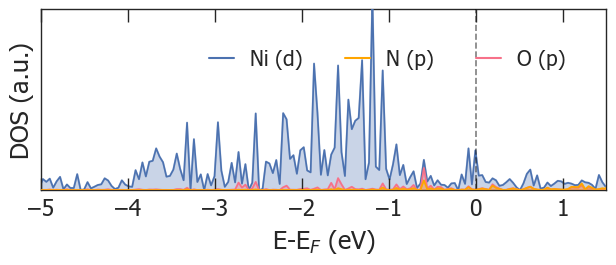

In [6]:
# Plot selected data
fig=plt.figure(figsize=(6.5,3))
fig.add_subplot(111, xticks=[], yticks=[])

axes = {}
for i, (key, value) in enumerate(data_dict.items()):
	axes[i] = fig.add_subplot(111, frame_on=False)
	value.plot(x='eV', y='PDOS', kind='line', ax=axes[i], xticks=[], yticks=[], xlabel='', ylabel='', legend=False, color=color_cycle[i])
	axes[i].fill_between(value['eV'], value['PDOS'], alpha=0.3, color=color_cycle[i])
	plt.xlim(-5, 1.5)
	plt.ylim(0,4.5)

plt.xticks(np.arange(-5, 1.6, step=1))
plt.yticks(np.arange(0, 5, step=0.5))

plt.xlabel("E-E$_F$ (eV)")
plt.ylabel("DOS (a.u.)")

axes[1].set_zorder(10)

handles = [plt.Line2D([], [], color=color_cycle[i], linewidth=1.5) for i in axes.keys()]
labels = list(data_dict.keys())
fig.legend(handles, labels, ncol=3)

plt.axvline(x = 0, color = 'black', linestyle = '--', alpha=0.5)

# Display the plot
plt.show()